# Spiking VSA Demos

## Prelims

In [1]:
from numpy import *
from matplotlib.pyplot import *
from tqdm import tqdm

In [2]:
def capacity(k, m, q):
    return 4.5*(k+0.7)*np.log(m/(30.*q**4))

In [3]:
capacity(50, 50, 0.1)

2217.884021928577

In [4]:
from phasorutils import *
from brian2 import *
from numpy import *
from matplotlib.pyplot import *
from spikingVSA import *
from copy import deepcopy
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
import time

%load_ext autoreload
%autoreload 2

# Simple Demos

## Adding Phases (convolution)

In [11]:
N = 1      # How many neurons in a layer
freq = 1.  # Baseline oscillation frequency (Hz)
T = 4      # Simulation time (seconds)

net = SpikingPhasorNet()

# Neuron A spikes at 0.3 seconds
A = GenerateSP(N=N, C=array([exp(2j*pi*0.73)]), freq=freq); net.add_pop(A)
# Neuron B spikes at 0.45 seconds
B = GenerateSP(N=N, C=array([exp(2j*pi*0.45)]), freq=freq); net.add_pop(B)

# Neuron C receives computes the sum of the phases.
C = PhaseSumPop(N=N, freq=freq); net.add_pop(C)
net.convolve(A, B, C)
net.br.add(C.stmon)

net.run(T*second)

In [12]:
print(f'A spikes: {A.spmon.spike_trains()[0]}')
print(f'B spikes: {B.spmon.spike_trains()[0]}')
print(f'C spikes: {C.spmon.spike_trains()[0]}')

A spikes: [0.73 1.73 2.73 3.73] s
B spikes: [0.45 1.45 2.45 3.45] s
C spikes: [1.1802 2.1801 3.18  ] s


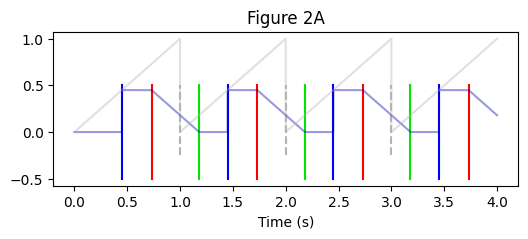

In [13]:
figure(figsize=[6,2])
A.spike_raster(offset=0, color='r')
B.spike_raster(offset=0, color='b')
C.spike_raster(offset=0, color=(0,0.9,0))
vlines([1, 2, 3.], -0.25, 0.5, colors=0.7*ones((3,)), linestyles='dashed');
#plot(C.stmon.t, C.stmon.p[0], color=(0.8, 0, 0, 0.4));
plot(C.stmon.t, C.stmon.q[0], color=(0, 0, 0.7, 0.4));
plot(C.stmon.t, C.stmon.x[0], color=(0.7, 0.7, 0.7, 0.4));
title('Figure 2A'); ylabel('');

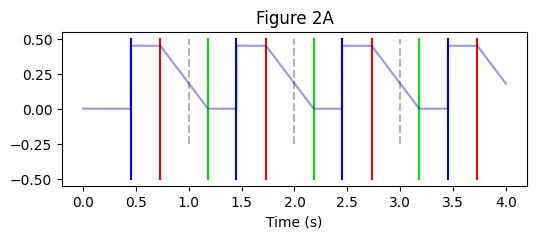

In [14]:
figure(figsize=[6,2])
A.spike_raster(offset=0, color='r')
B.spike_raster(offset=0, color='b')
C.spike_raster(offset=0, color=(0,0.9,0))
vlines([1, 2, 3.], -0.25, 0.5, colors=0.7*ones((3,)), linestyles='dashed');
#plot(C.stmon.t, C.stmon.p[0], color=(0.8, 0, 0, 0.4));
plot(C.stmon.t, C.stmon.q[0], color=(0, 0, 0.7, 0.4));
title('Figure 2A'); ylabel('');

### Phase wrap into next cycle
The sum of the phases is larger than the cycle, so the spike ends up in the next cycle. But it's all consistent with the fact that these spikes are all periodic.

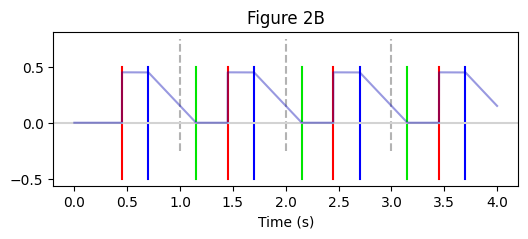

In [35]:
N = 1
freq = 1.
T = 4

net = SpikingPhasorNet()

# Neuron A spikes at 0.45 seconds
A = GenerateSP(N=N, C=array([exp(2j*pi*0.45)]), freq=freq); net.add_pop(A)
# Neuron B spikes at 0.7 seconds
B = GenerateSP(N=N, C=array([exp(2j*pi*0.7)]), freq=freq); net.add_pop(B)

C = PhaseSumPop(N=N, freq=freq); net.add_pop(C)
net.convolve(A, B, C)
net.br.add(C.stmon)

net.run(T*second)

figure(figsize=[6,2])
A.spike_raster(offset=0, color='r')
B.spike_raster(offset=0, color='b')
C.spike_raster(offset=0, color=(0,0.9,0))
vlines([1, 2, 3.], -0.25, 0.75, colors=0.7*ones((3,)), linestyles='dashed');
plt.axhline(0, color='lightgray')
#plot(C.stmon.t, C.stmon.p[0], color=(0.8, 0, 0, 0.4));
plot(C.stmon.t, C.stmon.q[0], color=(0, 0, 0.7, 0.4));
title('Figure 2B'); ylabel('');

## Subtracting Phases (deconvolution)

In [41]:
# Figure 3A
N = 1
freq = 1.
T = 4

net = SpikingPhasorNet()

# Neuron B spikes at 0.17 seconds
B = GenerateSP(N=N, C=array([exp(2j*pi*0.17)]), freq=freq); net.add_pop(B)
# Neuron A spikes at 0.65 seconds
A = GenerateSP(N=N, C=array([exp(2j*pi*0.65)]), freq=freq); net.add_pop(A)

C = PhaseDiffPop(N=N, freq=freq); net.add_pop(C)
net.deconvolve(A, B, C)

net.run(T*second)

In [42]:
print(f'A spikes: {A.spmon.spike_trains()[0]}')
print(f'B spikes: {B.spmon.spike_trains()[0]}')
print(f'C spikes: {C.spmon.spike_trains()[0]}')

A spikes: [0.65 1.65 2.65 3.65] s
B spikes: [0.17 1.17 2.17 3.17] s
C spikes: [0.6501 1.4801 2.4802 3.4803] s


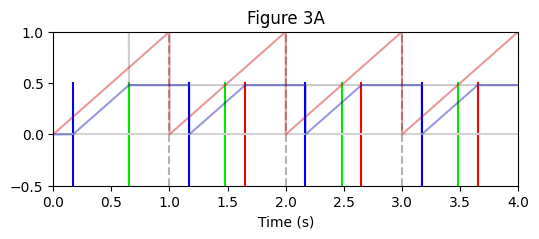

In [43]:
figure(figsize=[6,2])
A.spike_raster(offset=0, color='r')
B.spike_raster(offset=0, color='b')
C.spike_raster(offset=0, color=(0,0.9,0))
vlines([1, 2, 3.], -0.5, 1.5, colors=0.7*ones((3,)), linestyles='dashed');
plt.axhline(0, color='lightgray')
plot(C.stmon.t, C.stmon.Dphi[0], color=(0.5, 0.5, 0.5, 0.4));
plot(C.stmon.t, C.stmon.x[0], color=(0.8, 0, 0, 0.4));
plot(C.stmon.t, C.stmon.p[0], color=(0., 0, 0.7, 0.4));
axis([0,4,-0.5, 1]); ylabel('');
title('Figure 3A');

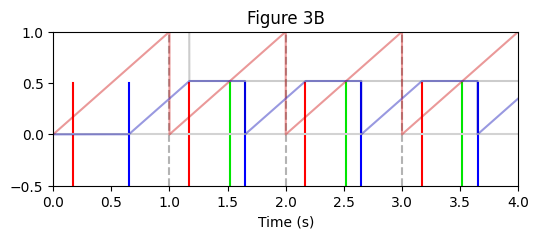

In [44]:
# Figure 3B
N = 1
freq = 1.
T = 4

net = SpikingPhasorNet()

# Neuron A spikes at 0.17 seconds
A = GenerateSP(N=N, C=array([exp(2j*pi*0.17)]), freq=freq); net.add_pop(A)
# Neuron B spikes at 0.65 seconds
B = GenerateSP(N=N, C=array([exp(2j*pi*0.65)]), freq=freq); net.add_pop(B)

C = PhaseDiffPop(N=N, freq=freq); net.add_pop(C)
net.deconvolve(A, B, C)

net.run(T*second)

figure(figsize=[6,2])
A.spike_raster(offset=0, color='r')
B.spike_raster(offset=0, color='b')
C.spike_raster(offset=0, color=(0,0.9,0))
vlines([1, 2, 3.], -0.5, 1.5, colors=0.7*ones((3,)), linestyles='dashed');
plt.axhline(0, color='lightgray')
plot(C.stmon.t, C.stmon.Dphi[0], color=(0.5, 0.5, 0.5, 0.4));
plot(C.stmon.t, C.stmon.x[0], color=(0.8, 0, 0, 0.4));
plot(C.stmon.t, C.stmon.p[0], color=(0., 0, 0.7, 0.4));
axis([0,4,-0.5, 1]); ylabel('');
title('Figure 3B');

## Phase Multiplication (fractional binding)

WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: 'th_post = (-0.5) + ((0.5 + (x_post * alpha215)) % 1)'
 [brian2.codegen.generators.base]


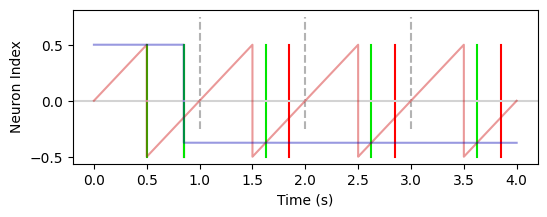

In [54]:
N = 1
freq = 1.
T = 4

net = SpikingPhasorNet()

# Neuron A spikes at 0.45 seconds
A = GenerateSP(N=N, C=array([exp(2j*pi*0.85)]), freq=freq); net.add_pop(A)

C = PhaseMultPop(N=N, freq=freq); net.add_pop(C)
net.fractional_bind(A, C, 2.5)

net.run(T*second)

figure(figsize=[6,2])
A.spike_raster(offset=0, color='r')
#B.spike_raster(offset=0, color='b')
C.spike_raster(offset=0, color=(0,0.9,0))
vlines([1, 2, 3.], -0.25, 0.75, colors=0.7*ones((3,)), linestyles='dashed');
plt.axhline(0, color='lightgray')
plot(C.stmon.t, C.stmon.x[0], color=(0.8, 0, 0, 0.4));
plot(C.stmon.t, C.stmon.th[0], color=(0, 0, 0.7, 0.4));

In [55]:
print(A.spmon.spike_trains()[0])
print(C.spmon.spike_trains()[0])

[0.85 1.85 2.85 3.85] s
[0.5    0.8501 1.6251 2.625  3.6248] s


## Spiking Hopfield

In [11]:
# Generate 5 vectors: A, B, C, X, Y
M = 50
N = 60
freq = 5.
ds = SparsePhaseMap(M=M, N=N, sparsity=1.)

In [12]:
# Spiking bundling
net = SpikingPhasorNet()

true_idx = random.randint(M)
corrupt_inp = deepcopy(ds.S[true_idx])
corrupt_inp *= exp(0.1*1j*random.normal(size=corrupt_inp.shape))
corrupt_inp[32:] = 0.

true_inp = GenerateSP(N=N, freq=freq, C=ds.S[true_idx]); net.add_pop(true_inp)
inp = GenerateSP(N=N, freq=freq, C=corrupt_inp); net.add_pop(inp)
G = SpikingPhasorPop(N=N, freq=freq, stop_at=1.); net.add_pop(G)
mh = SpikingModernHopfield(ds.S, freq=freq); net.add_pop(mh)

net.connect(inp, G, W=eye(N))
net.connect(G, mh, W=eye(N))

net.run(3*second)

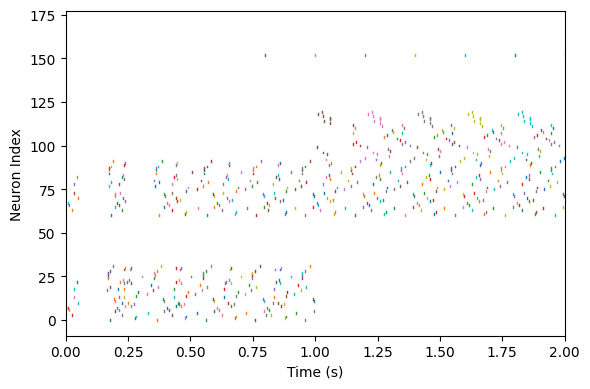

In [15]:
figure(figsize=(6,4))
n = G.spike_raster()
gca().set_prop_cycle(None)
mh.spike_raster(offset=n);
gca().set_xlim(0,2);
tight_layout();
#savefig('converge_to_pattern.pdf')

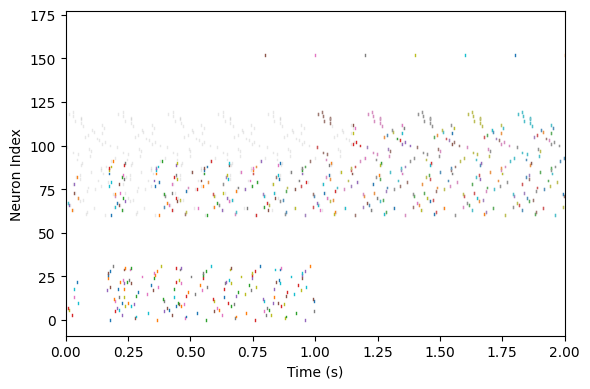

In [16]:
figure(figsize=(6,4))
n = G.spike_raster()
gca().set_prop_cycle(None)
mh.spike_raster(offset=n);
true_inp.spike_raster(offset=n, color=(0.75,0.75,0.75,0.35));
gca().set_xlim(0,2);
tight_layout();
#savefig('overlay_pattern.pdf')

True index is 32


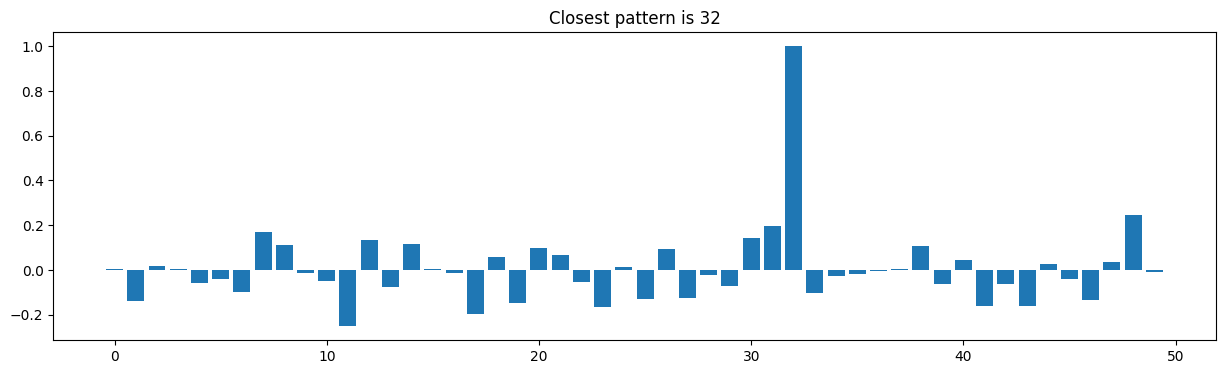

In [17]:
print(f'True index is {true_idx}')

k, sim = spiking_similarity(mh, ds.S, 1.8)

figure(figsize=(15,4))
bar(range(M), sim);
title(f'Closest pattern is {k}');

## Simple query

In [47]:
M = 6
N = 50
freq = 10.
#ds = SparsePhaseMap(M=M, N=N, sparsity=0.1)
ds = SparsePhaseMap(M=M, N=N, sparsity=1.)
#ds = SymmetricPhaseMap(M=M, N=N, sparsity=1.)

square = 0
circle = 1
red = 2
blue = 3
xcoord = 4
ycoord = 5

symbol_dict = {square: 'square', circle:'circle',
               red:'red', blue:'blue',
               xcoord:'xcoord', ycoord:'ycoord'}

# Add composite symbols to the vocabulary.
blah = [ds.S[red]*ds.S[square],
        ds.S[blue]*ds.S[circle],
        ds.S[red]*ds.S[circle],
        ds.S[blue]*ds.S[square],
        ds.S[red]*conj(ds.S[red])]
symbol_dict.update({M:'red square', M+1:'blue circle',
                    M+2:'red circle', M+3:'blue square',
                    M+4:'nothing'})
vocab = concatenate((ds.S, blah))
vocab.shape

(11, 50)

In [48]:
# Spiking bundling
net = SpikingPhasorNet()

#===== Encoding network =====
# Combine two complex vectors, and then encode that vector in spikes.
#v = ds.S[square]*ds.S[red] + ds.S[circle]*ds.S[blue]
#rS_bC = GenerateSP(N=N, C=v, freq=freq); net.add_pop(rS_bC)

colour_red = GenerateSP(N=N, C=ds.S[red], freq=freq); net.add_pop(colour_red)
shape_square = GenerateSP(N=N, C=ds.S[square], freq=freq); net.add_pop(shape_square)
colour_blue = GenerateSP(N=N, C=ds.S[blue], freq=freq); net.add_pop(colour_blue)
shape_circle = GenerateSP(N=N, C=ds.S[circle], freq=freq); net.add_pop(shape_circle)

red_square = PhaseSumPop(N=N, freq=freq); net.add_pop(red_square)
net.convolve(colour_red, shape_square, red_square)

blue_circle = PhaseSumPop(N=N, freq=freq); net.add_pop(blue_circle)
net.convolve(colour_blue, shape_circle, blue_circle)

# Bundle
rS_bC = PhaseBundlePop(N=N, freq=freq); net.add_pop(rS_bC)
net.bundle(red_square, blue_circle, rS_bC)

# Dereference "blue"
z1 = PhaseDiffPop(N=N, freq=freq); net.add_pop(z1)
net.deconvolve(rS_bC, colour_blue, z1)

# Dereference "square"
z2 = PhaseDiffPop(N=N, freq=freq); net.add_pop(z2)
net.deconvolve(rS_bC, red_square, z2)


net.run(2*second)

In [49]:
max_i, sims = spiking_similarity(z1, vocab, start_time=1.8)
#idx = argmax(sims)
symbol_dict[max_i]

'circle'

In [50]:
rcParams["text.usetex"] = True
rcParams["font.family"] = "serif"
rcParams["font.size"] = "12"

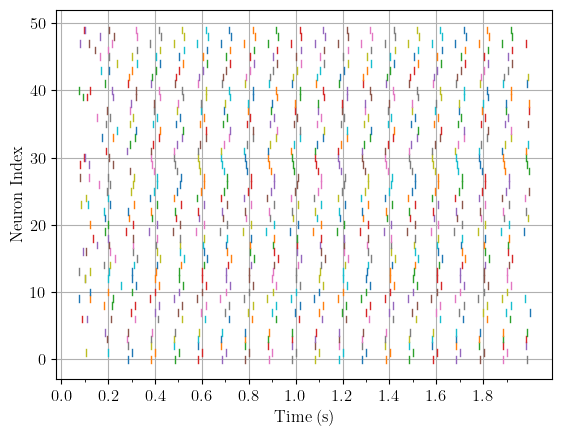

In [60]:
z2.spike_raster(lw=1)
grid('on');
gca().set_xticks(arange(0,2,0.2));
gca().set_xticks(arange(0,2,0.1), minor=True);
#yticks(arange(0,500,50));

## Stopwatch

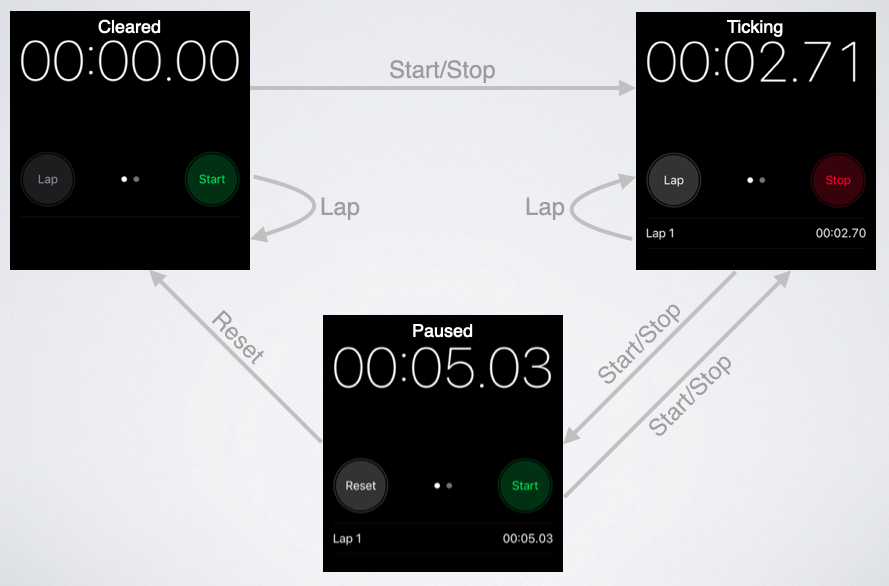

In [204]:
M = 5
N = 100
freq = 10.

ds = SparsePhaseMap(M=M, N=N, sparsity=1.)

r, s, c, t, p = [0, 1, 2, 3, 4]
print(r, s, c, t, p)

symbol_dict = {r: 'Reset/Record Lap', s: 'Start/Stop',
               c: 'Cleared', t: 'Ticking', p: 'Paused'}

R = ds.S[r]; _R = conj(R)
S = ds.S[s]; _S = conj(S)
C = ds.S[c]; _C = conj(C)
T = ds.S[t]; _T = conj(T)
P = ds.S[p]; _P = conj(P)

0 1 2 3 4


In [205]:
# Transitions
#    Reset              Start              Lap                Pause               Reset               Resume
#J = _C*_R*permute(C) + _C*_S*permute(T) + _T*_R*permute(T) + _T*_S*permute(P) + _P*_R*permute(C) + _P*_S*permute(T)
#J = make_unitary(J)

In [206]:
# Transitions
#    Reset              Start              Lap                Pause               Reset               Resume
J = C*R*permute(C) + C*S*permute(T) + T*R*permute(T) + T*S*permute(P) + P*R*permute(C) + P*S*permute(T)
#J = make_unitary(J)

### Test the vector algebra

In [207]:
Q = T * S  # Ticking, press Start/Stop -> Paused
#Q = C * S  # Cleared, press Start/Stop -> Ticking
#Q = P * R  # Paused, press Reset/Record Lap -> Cleared
#Q = P * S  # Paused, press Start/Stop -> Ticking
#Q = C * R  # Cleared, press Reset/Record Lap -> Cleared

#max_i, sims = similarity(J*Q, ds.S)
max_i, sims = similarity(ipermute(J*conj(Q)), ds.S)
print(f'The stopwatch is {symbol_dict[max_i]}')
print(sims)
print(Q[:3])

The stopwatch is Paused
[0.03039196 0.03769498 0.04042695 0.1477921  0.3691507 ]
[0.39681196+0.9178999j  0.7037682 -0.7104296j  0.95178497-0.30676606j]


### Network with constructed query

In [208]:
net = SpikingPhasorNet()

Jpop = GenerateSP(N=N, C=J, freq=freq); net.add_pop(Jpop)

state_pop = GenerateSP(N=N, C=P, freq=freq); net.add_pop(state_pop)
action_pop = GenerateSP(N=N, C=S, freq=freq); net.add_pop(action_pop)

query_pop = PhaseSumPop(N=N, freq=freq); net.add_pop(query_pop)
net.convolve(state_pop, action_pop, query_pop)

# Readout
z = PhaseDiffPop(N=N, freq=freq); net.add_pop(z)
net.deconvolve(Jpop, query_pop, z)

relay = SpikingPhasorPop(N=N, freq=freq, stop_at=1.); net.add_pop(relay)
net.connect(z, relay, W=eye(N))

hopfield = SpikingModernHopfield(ds.S, freq=freq); net.add_pop(hopfield)
net.ipermute_connect(relay, hopfield)

net.br.store()

net.run(2*second)

In [209]:
max_i, sims = spiking_similarity(hopfield, ds.S, start_time=1.9)
print(f'The stopwatch is {symbol_dict[max_i]}, similarity {sims[max_i]}')

The stopwatch is Ticking, similarity 0.9946098769473414


In [210]:
incorrect = 0
states = [C, T, P]
actions = [R, S]
all_sims = []
for ai, act in enumerate(actions):
    for si, st in enumerate(states):
        net.br.restore()
        action_pop.set_spikes(C=act)
        state_pop.set_spikes(C=st)
        net.run(2*second)
        max_i, sims = spiking_similarity(hopfield, ds.S, start_time=1.9)
        all_sims.append(sims)
        print(f'State: {symbol_dict[si+2]}, Action: {symbol_dict[ai]} -> {symbol_dict[max_i]}, similarity {sims[max_i]}, mean sim {mean(sims)}')

State: Cleared, Action: Reset/Record Lap -> Cleared, similarity 0.9689551922454285, mean sim 0.17707051358544085
State: Ticking, Action: Reset/Record Lap -> Ticking, similarity 0.9982908873203211, mean sim 0.19177130575576967
State: Paused, Action: Reset/Record Lap -> Cleared, similarity 0.9941313531748746, mean sim 0.18470778739037155
State: Cleared, Action: Start/Stop -> Ticking, similarity 0.9922026668716232, mean sim 0.18991237990657647
State: Ticking, Action: Start/Stop -> Paused, similarity 0.9871487304773094, mean sim 0.16948769217952878
State: Paused, Action: Start/Stop -> Ticking, similarity 0.9946098769473414, mean sim 0.19078137102388631


In [211]:
rcParams["text.usetex"] = True
rcParams["font.family"] = "serif"
rcParams["font.size"] = "16"

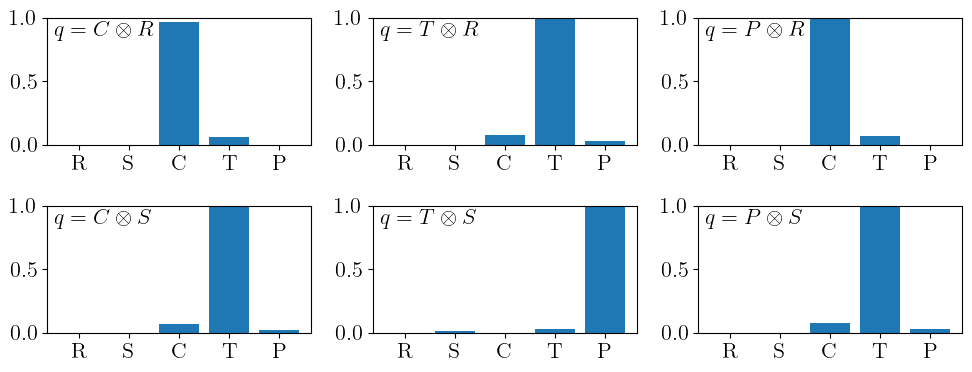

In [212]:
# Figure 7
vec = ('R', 'S', 'C', 'T', 'P')
q = [r'$q=C \otimes R$', r'$q=T \otimes R$', r'$q=P \otimes R$', r'$q=C \otimes S$', r'$q=T \otimes S$', r'$q=P \otimes S$']
figure(figsize=(10,4))
#fig, ax = subplots()
for k,s in enumerate(all_sims):
    subplot(2,3,k+1)
    bar(vec, s);
    ylim(0,1)
    text(-0.5,0.85, q[k]);
    #ax.bar_label(bar_container, vec);
#title(f'Closest pattern is {k}');
tight_layout();
#savefig('stopwatch_plots.pdf');

705


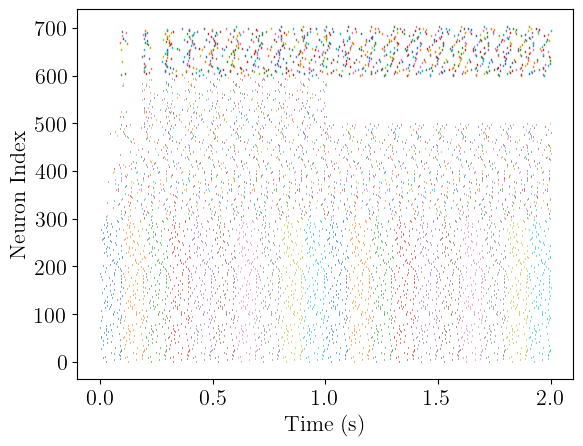

In [35]:
net.spike_raster()
print(net.total_neurons())

## SSPs

In [219]:
M = 5
N = 200
freq = 10.
#ds = SparsePhaseMap(M=M, N=N, sparsity=0.5)
ds = SparsePhaseMap(M=M, N=N, sparsity=1.)
#ds = SymmetricPhaseMap(M=M, N=N, sparsity=1.)

square = 0
circle = 1
red = 2
blue = 3
xcoord = 4
ycoord = 5

symbol_dict = {square: 'Square', circle:'Circle',
               red:'Red', blue:'Blue',
               xcoord:'X', ycoord:'Y'}

# Add composite symbols to the vocabulary.
blah = [ds.S[red]*ds.S[square],
        ds.S[blue]*ds.S[circle],
        ds.S[red]*ds.S[circle],
        ds.S[blue]*ds.S[square],
        ds.S[red]*conj(ds.S[red])]

symbol_dict.update({M:'Red Square', M+1:'Blue Circle',
                    M+2:'Red Circle', M+3:'Blue Square',
                    M+4:'Nothing'})

vocab = concatenate((ds.S, blah))
vocab.shape

(10, 200)

In [220]:
# Spiking bundling
net = SpikingPhasorNet()

colour_red = GenerateSP(N=N, C=ds.S[red], freq=freq); net.add_pop(colour_red)
shape_square = GenerateSP(N=N, C=ds.S[square], freq=freq); net.add_pop(shape_square)
colour_blue = GenerateSP(N=N, C=ds.S[blue], freq=freq); net.add_pop(colour_blue)
shape_circle = GenerateSP(N=N, C=ds.S[circle], freq=freq); net.add_pop(shape_circle)

red_square = PhaseSumPop(N=N, freq=freq); net.add_pop(red_square)
net.convolve(colour_red, shape_square, red_square)

blue_circle = PhaseSumPop(N=N, freq=freq); net.add_pop(blue_circle)
net.convolve(colour_blue, shape_circle, blue_circle)

x = GenerateSP(N=N, C=ds.S[xcoord], freq=freq); net.add_pop(x)
x1 = PhaseMultPop(N=N, freq=freq); net.add_pop(x1)
x2 = PhaseMultPop(N=N, freq=freq); net.add_pop(x2)

true_x1 = 1.85
true_x2 = -0.65
net.fractional_bind(x, x1, true_x1)
net.fractional_bind(x, x2, true_x2)

red_square_x = PhaseSumPop(N=N, freq=freq); net.add_pop(red_square_x)
net.convolve(red_square, x1, red_square_x)

blue_circle_x = PhaseSumPop(N=N, freq=freq); net.add_pop(blue_circle_x)
net.convolve(blue_circle, x2, blue_circle_x)

# Bundle
rS_bC = PhaseBundlePop(N=N, freq=freq); net.add_pop(rS_bC)
net.bundle(red_square_x, blue_circle_x, rS_bC)


# Where is the red square?
z1 = PhaseDiffPop(N=N, freq=freq); net.add_pop(z1)
net.deconvolve(rS_bC, red_square, z1)



# Where is the blue circle?
z2 = PhaseDiffPop(N=N, freq=freq); net.add_pop(z2)
net.deconvolve(rS_bC, blue_circle, z2)



# What is at location x=1.4?
z3 = PhaseDiffPop(N=N, freq=freq); net.add_pop(z3)
net.deconvolve(rS_bC, x1, z3)

relay3 = SpikingPhasorPop(N=N, freq=freq, stop_at=0.6); net.add_pop(relay3)
net.connect(z3, relay3, W=eye(N))

m3 = SpikingModernHopfield(vocab, freq=freq); net.add_pop(m3)
net.connect(relay3, m3, W=eye(N))

In [221]:
net.total_neurons()

3410

In [222]:
start = time.time()
net.run(1.5*second)
duration = time.time() - start
print(f'Time: {duration}')

WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: 'pth_post = x_post * alpha890'
 [brian2.codegen.generators.base]
WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. Abstract code: 'pth_post = x_post * alpha178'
 [brian2.codegen.generators.base]


Time: 31.65916609764099


210

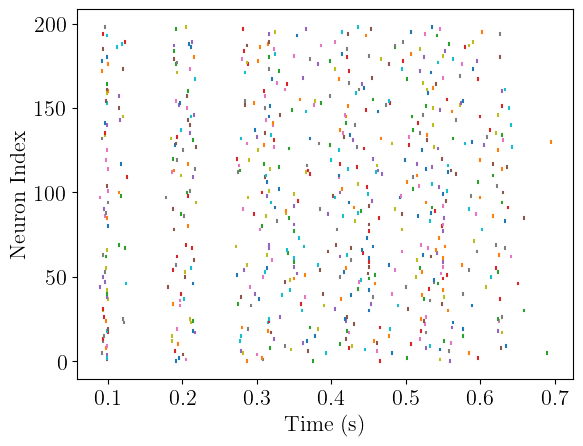

In [228]:
m3.spike_raster()

In [227]:
sims

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [226]:
# What is at location x1?
max_i, sims = spiking_similarity(m3, vocab, start_time=1.4)
print(f'The {symbol_dict[max_i]} is at location x1 (similarity = {sims[max_i]})')
print('(correct answer: red square)')

KeyError: -1

Max at x=1.8899999999999997 [True x is 1.85]
Max at x=-0.6499999999999999 [True x is -0.65]


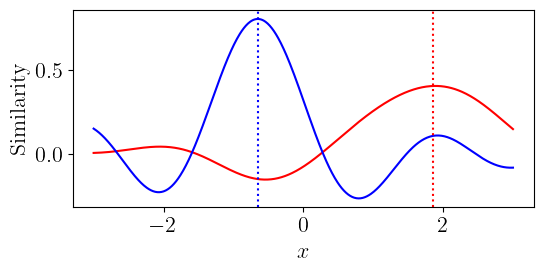

In [225]:
# Where is the red square?
figure(figsize=(6,3))
xvals = linspace(-3, 3, 601)
max_i, s = spatial_similarity(z1, vocab[4], xvals, start_time=1.4)
print(f'Max at x={xvals[argmax(s)]} [True x is {true_x1}]');
plot(xvals, s, 'r');

max_i, s = spatial_similarity(z2, vocab[4], xvals, start_time=1.4)
print(f'Max at x={xvals[argmax(s)]} [True x is {true_x2}]');
plot(xvals, s, 'b');

xlabel(r'$x$')
ylabel('Similarity');
tight_layout();
axvline(x=true_x1, ymin=0, ymax=1, color='r', ls=':');
axvline(x=true_x2, ymin=0, ymax=1, color='b', ls=':');
savefig('ssp_demo.pdf');

### Banner figures

Max at x=-0.5899999999999999 [True x is -0.65]


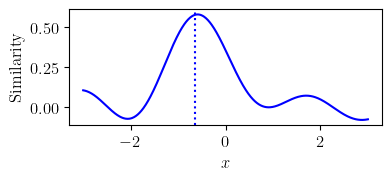

In [191]:
# Where is the red square?
figure(figsize=(4,2))
xvals = linspace(-3, 3, 601)

# max_i, s = spatial_similarity(z1, vocab[4], xvals, start_time=1.9)
# print(f'Max at x={xvals[argmax(s)]} [True x is {true_x1}]');
# plot(xvals, s, 'r');

max_i, s = spatial_similarity(z2, vocab[4], xvals, start_time=1.4)
print(f'Max at x={xvals[argmax(s)]} [True x is {true_x2}]');
plot(xvals, s, 'b');

xlabel(r'$x$')
ylabel('Similarity');
tight_layout();
#axvline(x=true_x1, ymin=0, ymax=1, color='r', ls=':');
axvline(x=true_x2, ymin=0, ymax=1, color='b', ls=':');
savefig('ssp_banner.pdf');

('Square', -0.0017135190012396695)
('Circle', -0.02281316799091962)
('Red', -0.04101732142283284)
('Blue', -0.07528488240777668)
('X', -0.1376358106720117)
('Red Square', 0.9563429899062033)
('Blue Circle', 0.05930714032480779)
('Red Circle', -0.16024742595266134)
('Blue Square', -0.07418932509659773)
('Nothing', -0.06506433097719475)


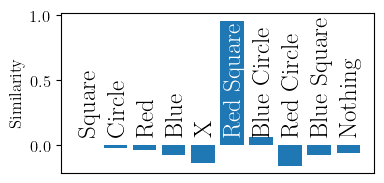

In [190]:
# What is at location x1?
max_k, sims = spiking_similarity(m3, vocab, start_time=1.4)
print(*list(zip(symbol_dict.values(),sims)), sep='\n')
symbol_dict[max_k]
idxs = range(len(sims))

figure(figsize=(4,2))
bar(idxs, sims);

fs = 18
nudge = 0.32
for k in [0,1,2,3,4,6,7,8,9]:
    text(k-nudge, 0.1, symbol_dict[k], fontsize=fs, rotation=90);
text(max_k-nudge, 0.1, symbol_dict[max_k], color='white', fontsize=fs, rotation=90);
ylabel('Similarity'); yticks([0, 0.5, 1]);
xticks([]); tight_layout();
savefig('sim_barplot.pdf');

In [185]:
def plot_raster(pop, fname):
    figure(figsize=(4,1.5))
    pop.spike_raster(color='gray', lw=1.5);
    xlim([1,1.5])
    gca().set_xticks(arange(1,1.5001,0.1));
    ylabel('')
    yticks([])
    grid(visible=True, axis='x'); #grid('y', False);
    tight_layout();
    savefig(fname)

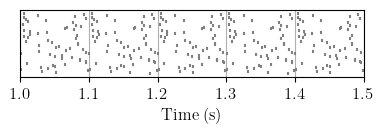

In [186]:
plot_raster(rS_bC, 'RSBC_raster.pdf')

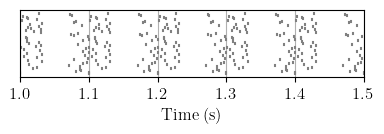

In [187]:
plot_raster(x2, 'X_raster.pdf')

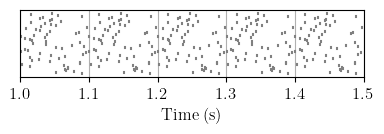

In [192]:
plot_raster(z3, 'atX_raster.pdf')

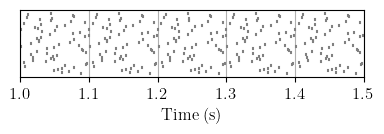

In [188]:
plot_raster(red_square, 'RS_raster.pdf')

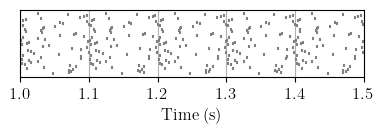

In [189]:
plot_raster(z2, 'SSP_raster.pdf')

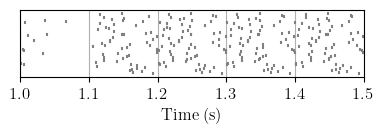

In [182]:
figure(figsize=(4,1.5))
m3.spike_raster_G(m3.Gspmon.spike_trains(), color='gray', lw=1.5);
xlim([1,1.5])
gca().set_xticks(arange(1,1.5001,0.1));
ylabel('')
yticks([])
grid(visible=True, axis='x'); #grid('y', False);
tight_layout();
savefig('Hopfield_raster.pdf')